In [1]:
# LOADING AND PREPROCESSING

from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = load_breast_cancer()
data
X = data.data
y = data.target

# Convert to a DataFrame for convenience
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

# Display the first few rows
print(df.head())



   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [2]:
df.duplicated().sum()

0

In [3]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [4]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [5]:
# Checking Outliers

numeric=df.select_dtypes("number")
numeric.skew()

mean radius                0.942380
mean texture               0.650450
mean perimeter             0.990650
mean area                  1.645732
mean smoothness            0.456324
mean compactness           1.190123
mean concavity             1.401180
mean concave points        1.171180
mean symmetry              0.725609
mean fractal dimension     1.304489
radius error               3.088612
texture error              1.646444
perimeter error            3.443615
area error                 5.447186
smoothness error           2.314450
compactness error          1.902221
concavity error            5.110463
concave points error       1.444678
symmetry error             2.195133
fractal dimension error    3.923969
worst radius               1.103115
worst texture              0.498321
worst perimeter            1.128164
worst area                 1.859373
worst smoothness           0.415426
worst compactness          1.473555
worst concavity            1.150237
worst concave points       0

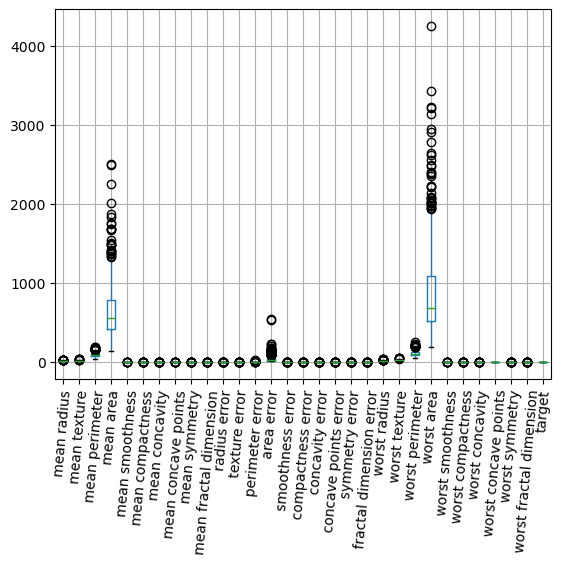

In [6]:
import matplotlib.pyplot as plt
numeric.boxplot()
plt.xticks(rotation=85)
plt.show() # Outliers present

In [7]:
numeric.hist()

array([[<Axes: title={'center': 'mean radius'}>,
        <Axes: title={'center': 'mean texture'}>,
        <Axes: title={'center': 'mean perimeter'}>,
        <Axes: title={'center': 'mean area'}>,
        <Axes: title={'center': 'mean smoothness'}>,
        <Axes: title={'center': 'mean compactness'}>],
       [<Axes: title={'center': 'mean concavity'}>,
        <Axes: title={'center': 'mean concave points'}>,
        <Axes: title={'center': 'mean symmetry'}>,
        <Axes: title={'center': 'mean fractal dimension'}>,
        <Axes: title={'center': 'radius error'}>,
        <Axes: title={'center': 'texture error'}>],
       [<Axes: title={'center': 'perimeter error'}>,
        <Axes: title={'center': 'area error'}>,
        <Axes: title={'center': 'smoothness error'}>,
        <Axes: title={'center': 'compactness error'}>,
        <Axes: title={'center': 'concavity error'}>,
        <Axes: title={'center': 'concave points error'}>],
       [<Axes: title={'center': 'symmetry error'}>

In [8]:
# Remove Outliers

# Calculate IQR for each feature

# Define a function to calculate outlier bounds
def remove_outliers(df):
    # Create a copy to avoid modifying the original DataFrame
    df_clean = df.copy()
    
    # Identify outliers using IQR 
    for i in df.columns[:-1]:  # Exclude the target column
        Q1 = df_clean[i].quantile(0.25)
        Q3 = df_clean[i].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remove outliers
        df_clean = df_clean[(df_clean[i] >= lower_bound) & (df_clean[i] <= upper_bound)]
    
    return df_clean

# Apply the IQR outlier removal
df_clean = remove_outliers(df)
print(df_clean)
print("Original dataset shape:",df.shape)
print("Cleaned dataset shape:",df_clean.shape)


     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
16        14.680         20.13           94.74      684.5          0.09867   
19        13.540         14.36           87.46      566.3          0.09779   
20        13.080         15.71           85.63      520.0          0.10750   
21         9.504         12.44           60.34      273.9          0.10240   
37        13.030         18.42           82.61      523.8          0.08983   
..           ...           ...             ...        ...              ...   
552       12.770         29.43           81.35      507.9          0.08276   
554       12.880         28.92           82.50      514.3          0.08123   
555       10.290         27.61           65.67      321.4          0.09030   
560       14.050         27.15           91.38      600.4          0.09929   
566       16.600         28.08          108.30      858.1          0.08455   

     mean compactness  mean concavity  mean concave points  mea

In [9]:
numeric2 = df_clean.select_dtypes("number")
numeric2.skew() # skewness has changed

mean radius               -0.128294
mean texture               0.734160
mean perimeter            -0.093142
mean area                  0.212862
mean smoothness            0.215284
mean compactness           0.609782
mean concavity             1.082927
mean concave points        1.033365
mean symmetry              0.187767
mean fractal dimension     0.507242
radius error               1.033028
texture error              0.690570
perimeter error            1.061449
area error                 1.098519
smoothness error           0.618078
compactness error          0.915554
concavity error            0.813968
concave points error       0.417194
symmetry error             0.558661
fractal dimension error    0.802053
worst radius               0.043051
worst texture              0.457921
worst perimeter            0.102289
worst area                 0.442374
worst smoothness           0.131011
worst compactness          0.470541
worst concavity            0.516711
worst concave points       0

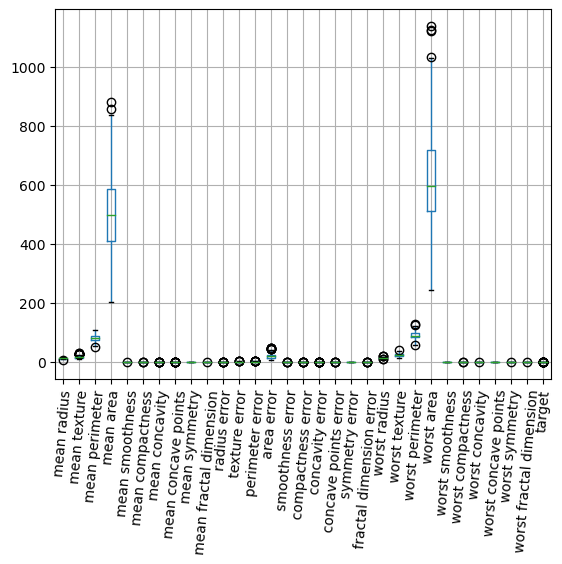

In [15]:
numeric2.boxplot()
plt.xticks(rotation=85)
plt.show()

In [11]:
df_clean['target'].unique() # no need of label encoding

array([0, 1])

In [12]:
# Separate features and target

X_clean = df_clean.drop('target', axis=1)
y_clean = df_clean['target']


In [13]:
# Split Data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Scale the features
x = StandardScaler()
X_train_scaled = x.fit_transform(X_train)
X_test_scaled = x.transform(X_test)


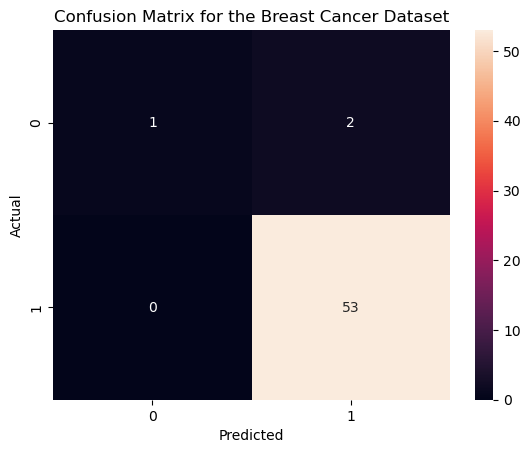

Model: Logistic Regression
Logistic Regression Accuracy: 0.9643
Confusion Matrix:
[[ 1  2]
 [ 0 53]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.96      1.00      0.98        53

    accuracy                           0.96        56
   macro avg       0.98      0.67      0.74        56
weighted avg       0.97      0.96      0.96        56




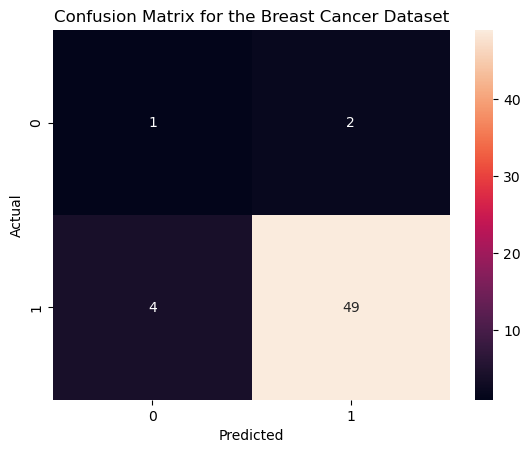

Model: Logistic Regression
Decision Tree Accuracy: 0.8929
Confusion Matrix:
[[ 1  2]
 [ 0 53]]
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.33      0.25         3
           1       0.96      0.92      0.94        53

    accuracy                           0.89        56
   macro avg       0.58      0.63      0.60        56
weighted avg       0.92      0.89      0.91        56


Model: Decision Tree
Decision Tree Accuracy: 0.8929
Confusion Matrix:
[[ 1  2]
 [ 4 49]]
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.33      0.25         3
           1       0.96      0.92      0.94        53

    accuracy                           0.89        56
   macro avg       0.58      0.63      0.60        56
weighted avg       0.92      0.89      0.91        56




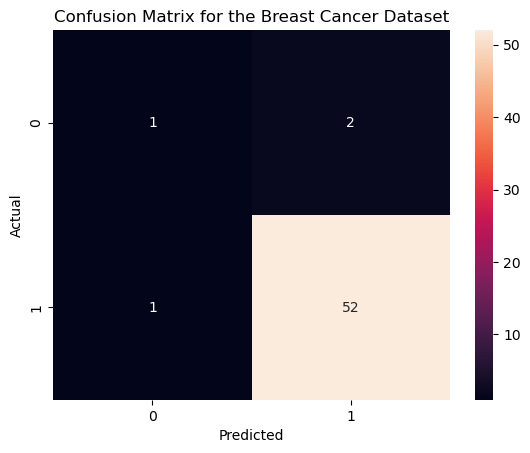

Model: Logistic Regression
Random Forest Accuracy: 0.9464
Confusion Matrix:
[[ 1  2]
 [ 0 53]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.96      0.98      0.97        53

    accuracy                           0.95        56
   macro avg       0.73      0.66      0.69        56
weighted avg       0.94      0.95      0.94        56


Model: Decision Tree
Random Forest Accuracy: 0.9464
Confusion Matrix:
[[ 1  2]
 [ 4 49]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.96      0.98      0.97        53

    accuracy                           0.95        56
   macro avg       0.73      0.66      0.69        56
weighted avg       0.94      0.95      0.94        56


Model: Random Forest
Random Forest Accuracy: 0.9464
Confusion Matrix:
[[ 1  2]
 [ 1 52

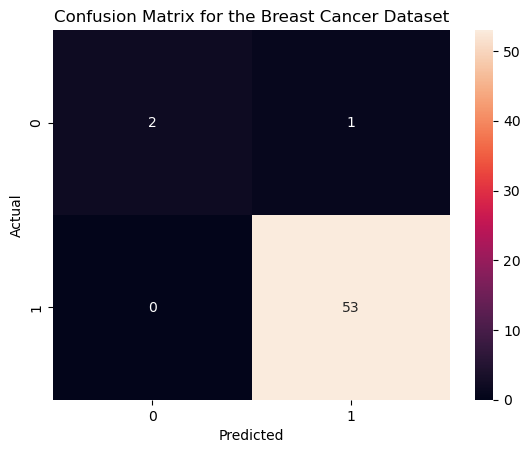

Model: Logistic Regression
SVM Accuracy: 0.9821
Confusion Matrix:
[[ 1  2]
 [ 0 53]]
SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.98      1.00      0.99        53

    accuracy                           0.98        56
   macro avg       0.99      0.83      0.90        56
weighted avg       0.98      0.98      0.98        56


Model: Decision Tree
SVM Accuracy: 0.9821
Confusion Matrix:
[[ 1  2]
 [ 4 49]]
SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.98      1.00      0.99        53

    accuracy                           0.98        56
   macro avg       0.99      0.83      0.90        56
weighted avg       0.98      0.98      0.98        56


Model: Random Forest
SVM Accuracy: 0.9821
Confusion Matrix:
[[ 1  2]
 [ 1 52]]
SVM Classification Report:
              precis

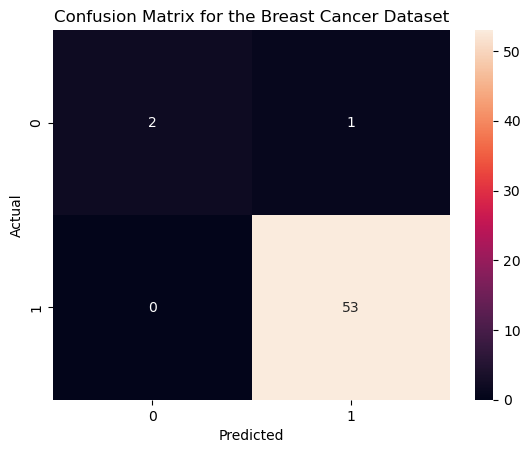

Model: Logistic Regression
k-NN Accuracy: 0.9821
Confusion Matrix:
[[ 1  2]
 [ 0 53]]
k-NN Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.98      1.00      0.99        53

    accuracy                           0.98        56
   macro avg       0.99      0.83      0.90        56
weighted avg       0.98      0.98      0.98        56


Model: Decision Tree
k-NN Accuracy: 0.9821
Confusion Matrix:
[[ 1  2]
 [ 4 49]]
k-NN Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.98      1.00      0.99        53

    accuracy                           0.98        56
   macro avg       0.99      0.83      0.90        56
weighted avg       0.98      0.98      0.98        56


Model: Random Forest
k-NN Accuracy: 0.9821
Confusion Matrix:
[[ 1  2]
 [ 1 52]]
k-NN Classification Report:
              

In [16]:
# Train and Evaluate models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

# Initialize classifiers

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "k-NN": KNeighborsClassifier()
}

# Train and evaluate each model

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    class_report = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for the Breast Cancer Dataset')
    plt.show()
    
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Confusion Matrix": conf_matrix,
        "Classification Report": class_report
    })
    
    
    # Print results
    for result in results: 
        print(f"Model: {result['Model']}")
        print(f"{name} Accuracy: {accuracy:.4f}")
        print("Confusion Matrix:")
        print(result['Confusion Matrix'])
        print(f"{name} Classification Report:")
        print(class_report)
        print()


In [17]:
# Find the best model based on Accuracy Score

best_model = max(results, key=lambda x: x["Accuracy"])
worst_model = min(results, key=lambda x: x["Accuracy"])

print(f"Best Model based on Accuracy: {best_model['Model']} with Accuracy: {best_model['Accuracy']:.4f}")
print(f"Worst Model based on Accuracy: {worst_model['Model']} with Accuracy: {worst_model['Accuracy']:.4f}")

Best Model based on Accuracy: SVM with Accuracy: 0.9821
Worst Model based on Accuracy: Decision Tree with Accuracy: 0.8929
